Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras # to build Neural Network

Loading data


In [ ]:
#Loading data:
'''Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot '''
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # load dataset from  keras


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#shape of data
test_df = X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

In [ ]:
#image in 2D numpy array 28x28 pixel
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
 #ankle boot
y_train[0]

9

In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

sample:

In [ ]:
plt.imshow(X_train[0], cmap='Purples')

NameError: ignored

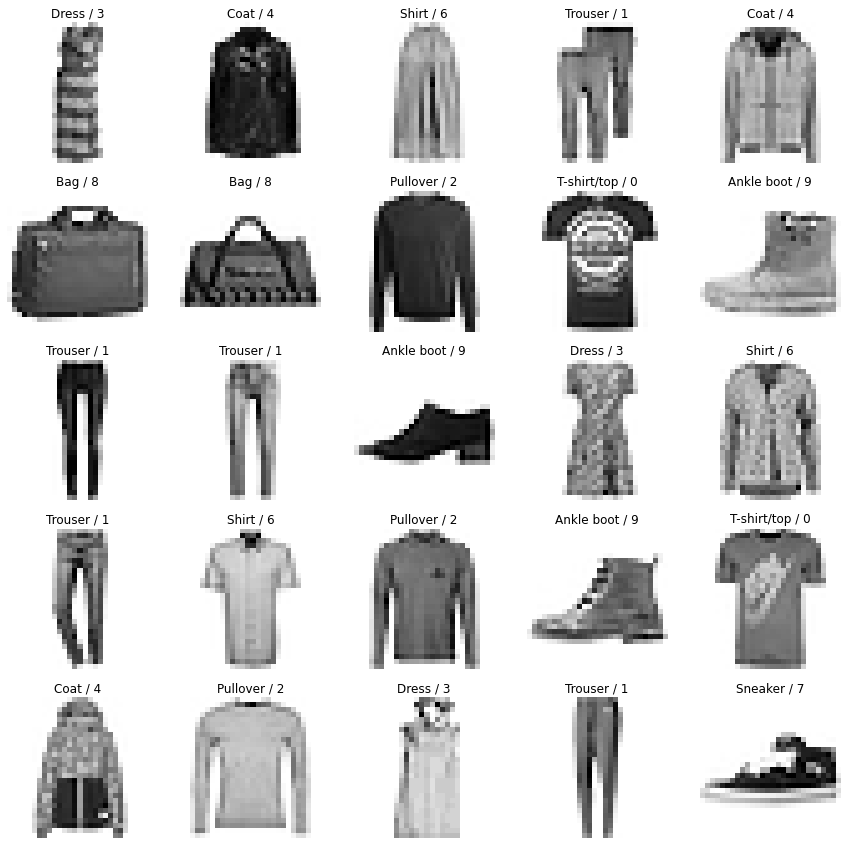

In [ ]:
plt.figure(figsize=(15, 15))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(labels[y_train[i]], y_train[i]))

Dimension

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


In [ ]:
X_train.ndim

4

In [ ]:
#Scale
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Split Dataset

from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

CNN -Convolutional Nureal Network

In [ ]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=256, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dense(units=10, activation='softmax')
                         ])


In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))



Epoch 1/5
3000/3000 [==============================] - 44s 14ms/step - loss: 0.5625 - accuracy: 0.7901 - val_loss: 0.3856 - val_accuracy: 0.8594
Epoch 2/5
3000/3000 [==============================] - 42s 14ms/step - loss: 0.3635 - accuracy: 0.8681 - val_loss: 0.3166 - val_accuracy: 0.8859
Epoch 3/5
3000/3000 [==============================] - 41s 14ms/step - loss: 0.3142 - accuracy: 0.8856 - val_loss: 0.3113 - val_accuracy: 0.8892
Epoch 4/5
3000/3000 [==============================] - 41s 14ms/step - loss: 0.2860 - accuracy: 0.8944 - val_loss: 0.2859 - val_accuracy: 0.8980
Epoch 5/5
3000/3000 [==============================] - 41s 14ms/step - loss: 0.2724 - accuracy: 0.9004 - val_loss: 0.2880 - val_accuracy: 0.8994


Testing model

In [ ]:
y_pred = cnn_model.predict(X_test)
score = cnn_model.evaluate(X_test, y_test)

print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


313/313 [==============================] - 3s 8ms/step - loss: 0.2986 - accuracy: 0.8916
Test Loss : 0.2986
Test Accuracy : 0.8916


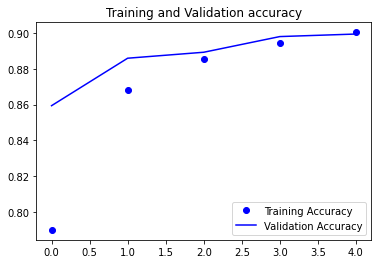

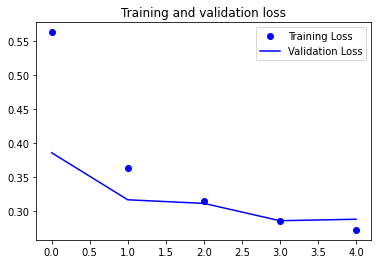

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()